In [1]:
import os
import pandas as pd

current_dir = os.getcwd()
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
path_file = os.path.join(current_dir, "datasets/iris.data")
data = pd.read_csv(path_file, header=None, names=column_names)

In [164]:
X = data[['sepal_length', 'petal_length']]
y = data['species']

In [165]:
X.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [166]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [167]:
# y = y.map({'Iris-setosa': -1, 'Iris-versicolor': 1, 'Iris-virginica': 0})
from sklearn.preprocessing import LabelEncoder
import numpy as np

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_encoded = np.where(y_encoded == 0, -1, y_encoded)
y_encoded = np.where(y_encoded == 1, 1, y_encoded)
y_encoded = np.where(y_encoded == 2, 0, y_encoded)

y = y_encoded

In [168]:
mask = y != 0
X = X[mask]
y = y[mask]

<Axes: xlabel='sepal_length', ylabel='petal_length'>

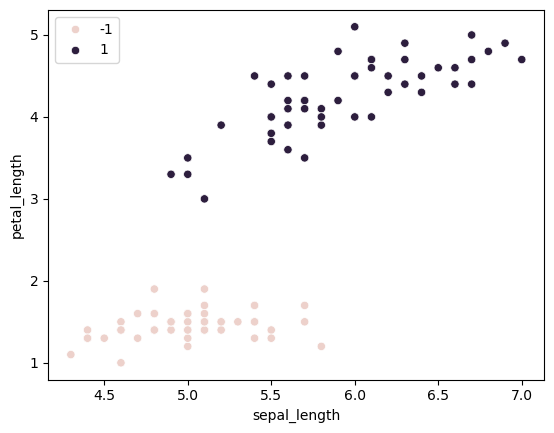

In [169]:
import seaborn as sns
sns.scatterplot(x='sepal_length', y='petal_length', data=X, hue=y)

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [171]:
from sklearn.linear_model import Perceptron

percep_clf = Perceptron()
percep_clf.fit(X_train, y_train)

Perceptron()

In [172]:
y_pred = percep_clf.predict(X_test)

In [173]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,-1,-1
1,1,1
2,-1,-1
3,1,1
4,1,1


In [174]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia (SVM):', accuracy)

Acurácia (SVM): 1.0


In [175]:
target_names = ['Iris-setosa', 'Iris-versicolor']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20



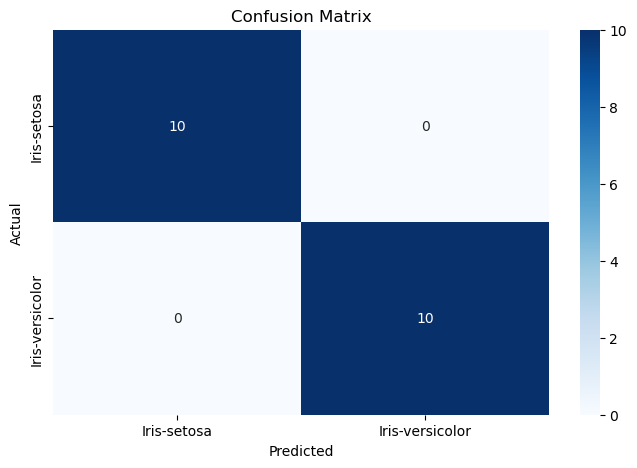

In [176]:
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
class_labels = ['Iris-setosa', 'Iris-versicolor']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()